In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent


In [2]:
df=pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats",attrs={"id":"results2024-202591_overall"})[0]
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,24,17,6,1,58,23,35,57,2.38,54.5,21.8,32.7,1.36,D W W W D,60289,Mohamed Salah - 22,Alisson,NaN
1,2,Arsenal,24,14,8,2,49,22,27,50,2.08,38.6,21.2,17.4,0.73,D W D W W,60276,Kai Havertz - 9,David Raya,NaN
2,3,Nott'ham Forest,24,14,5,5,40,27,13,47,1.96,31.7,26.7,5.0,0.21,W D W L W,30056,Chris Wood - 17,Matz Sels,NaN
3,4,Chelsea,25,12,7,6,47,34,13,43,1.72,49.2,35.6,13.5,0.54,D W L W L,39608,Cole Palmer - 14,Robert Sánchez,NaN
4,5,Manchester City,24,12,5,7,48,35,13,41,1.71,44.2,34.1,10.0,0.42,W D W W L,52944,Erling Haaland - 19,Ederson,NaN
5,6,Newcastle Utd,24,12,5,7,42,29,13,41,1.71,41.3,29.4,11.9,0.49,W W L W L,52186,Alexander Isak - 17,Nick Pope,NaN
6,7,Bournemouth,24,11,7,6,41,28,13,40,1.67,45.6,31.2,14.4,0.60,W D W W L,11213,Justin Kluivert - 11,Kepa Arrizabalaga,NaN
7,8,Brighton,25,9,10,6,38,38,0,37,1.48,33.7,36.9,-3.1,-0.12,W W L L W,32398,"Danny Welbeck, Kaoru Mitoma - 6",Bart Verbruggen,NaN
8,9,Aston Villa,24,10,7,7,34,37,-3,37,1.54,34.2,29.8,4.4,0.18,W W D D L,41878,Ollie Watkins - 10,Emiliano Martínez,NaN
9,10,Fulham,24,9,9,6,36,32,4,36,1.50,33.9,27.6,6.3,0.26,D L W L W,26480,Raúl Jiménez - 9,Bernd Leno,NaN


In [3]:
df['Badge']=df['Squad'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//FBREF//premier legue badges//{x}.png"
)

In [4]:
df=df[[
    'Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'
]]

In [85]:
bg_color="#dddddd"
text_color="#ffffff"
row_color={
    'top4':'#B8D576',
    'top6':'#9eb865',
    'bottom3':'#D2665A',
    'even':'#877666',
    'odd':'#002E2C'
}
plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Alice'

In [90]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        title="",
        border='left',
        # header_textprops=header_props,
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.5,
        plot_fn=image,
        title="",
        border='left',
    ),
    ColumnDefinition(
        name="Squad",
        textprops={'ha':'left','fontweight':'bold'},
        width=1.75,
        title="",
        # border='left',
    ),
        ColumnDefinition(
        name="MP",
        # group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="W",
        # group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
        # text_cmap=matplotlib.cm.PiYG
    ),
    ColumnDefinition(
        name="D",
        # group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="L",
        # group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
        # plot_fn=bar,
        # plot_kw={
        #     'cmap':normed_cmap(df['L'],matplotlib.cm.PiYG_r,num_stds=2),
        #     # 'formatter':decimal_to_percent,
        #     # 'annotate':True,
        #         }  
    ),
    ColumnDefinition(
        name="GF",
        # group="Goals",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="GA",
        # group="Goals",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="GD",
        # group="Goals",
        textprops={"ha": "center"},
        width=0.5,
        border='left',
        cmap=normed_cmap(df["GD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="Pts",
        # group="Poin
        # \ts",
        textprops={"ha": "center"},
        width=0.5,
        border='both',
    ),
]

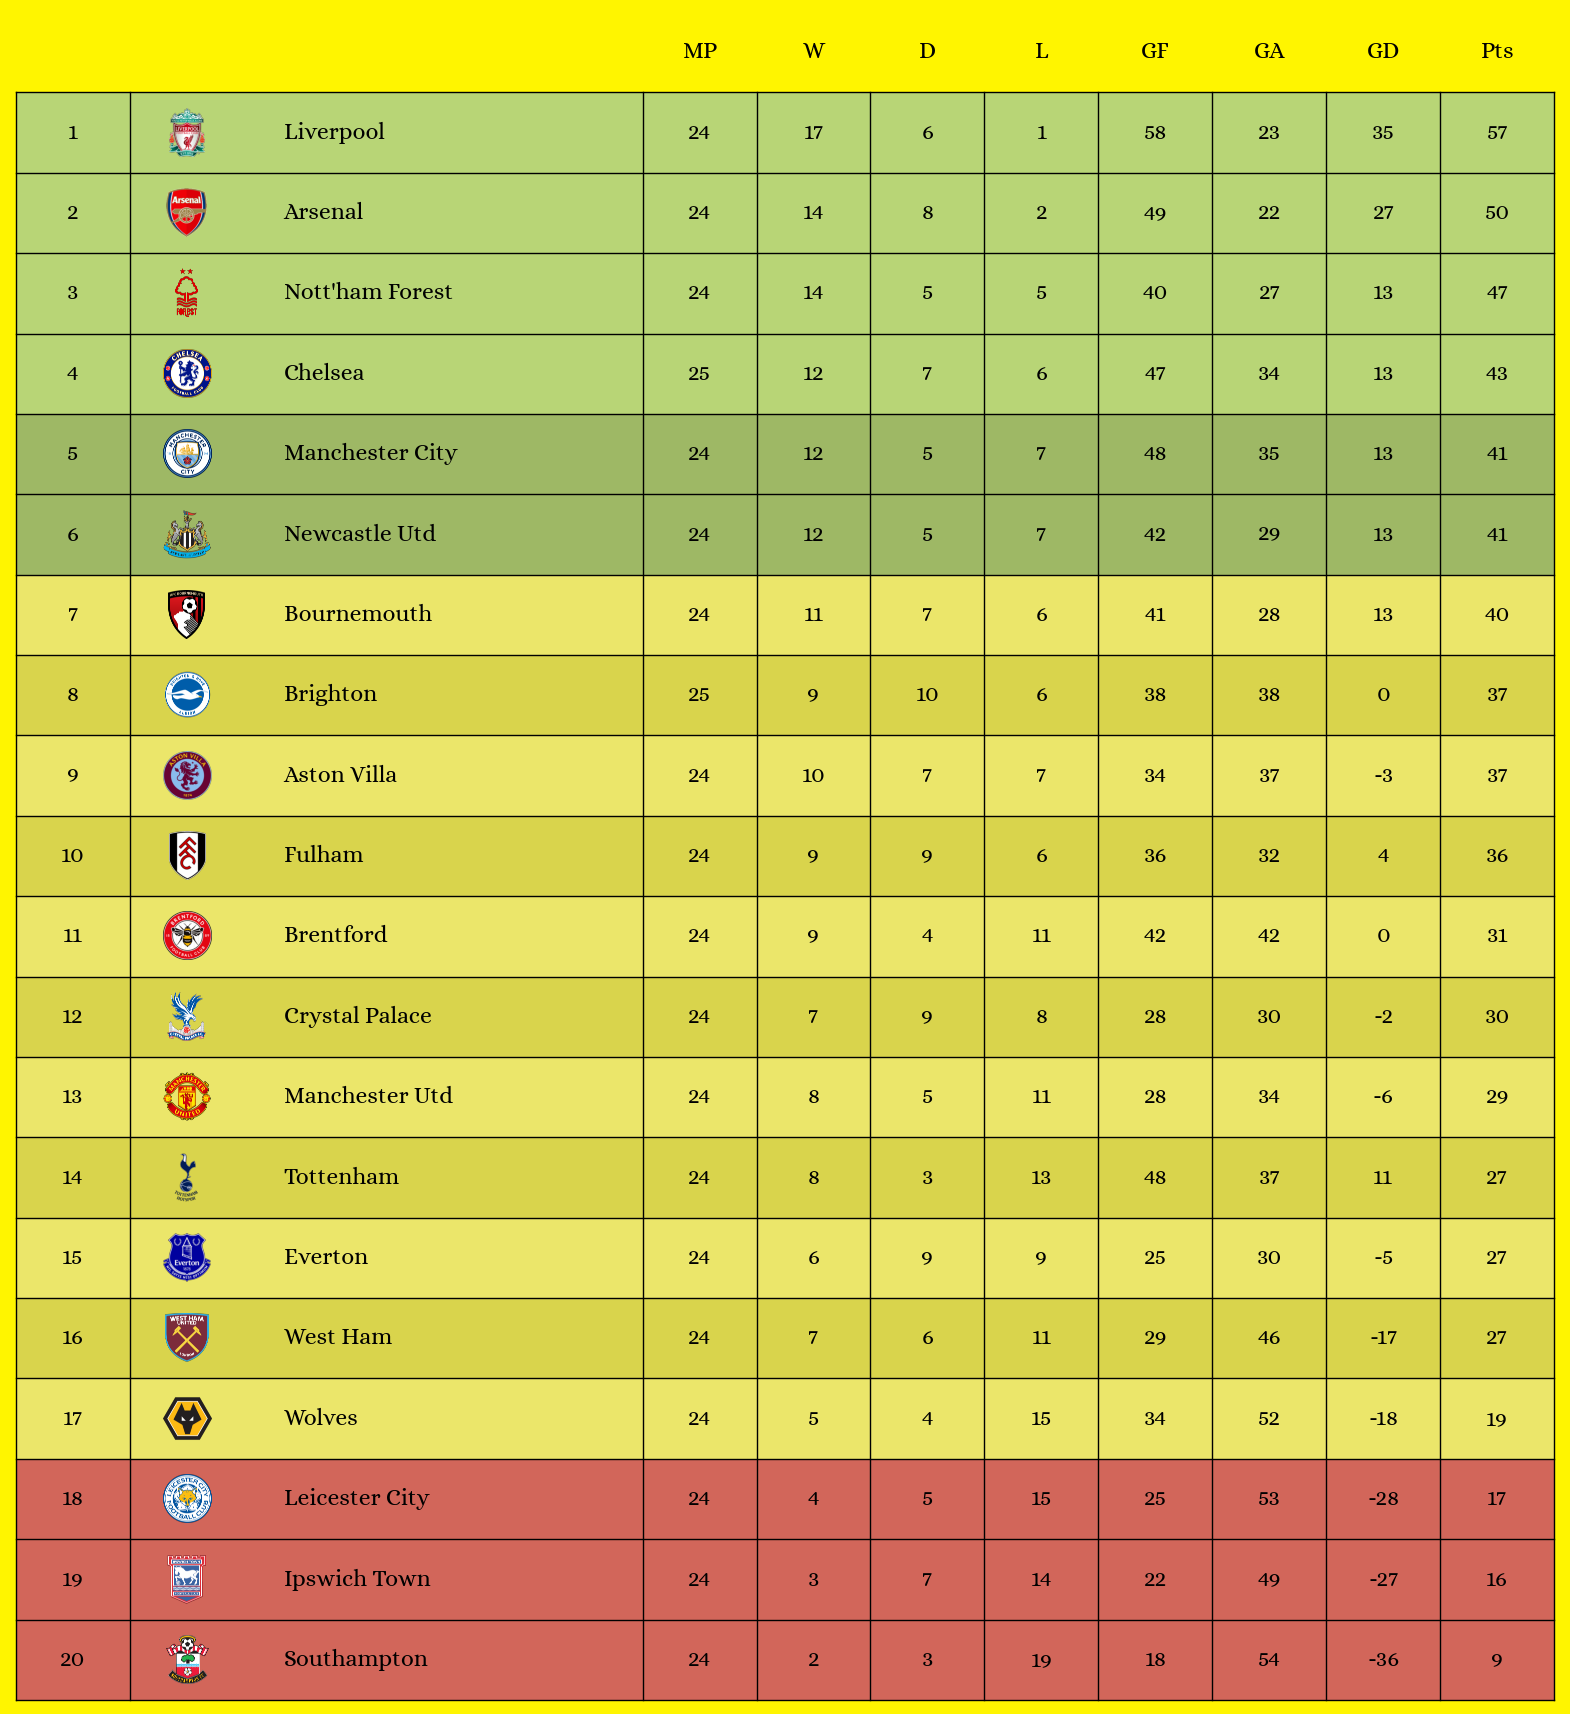

In [110]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor('#fff500')
ax.set_facecolor('#fff500')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '-',"color":"#000000"},
    footer_divider=True,
    textprops={"fontsize": 17,"color":'#000000'},
    footer_divider_kw={"color": "#000000", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#000000"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#000000'},
    ax=ax,
)# This will set the font color of the columns based on the cmap so the text is readable
table.cells[10, 3].textprops["color"] = "   "
# ax.set_title("\nPremier League Points Table",fontsize=25)
for m in [0,1,2,3]:
    table.rows[m].set_facecolor(row_color["top4"])
for m in [4,5]:
    table.rows[m].set_facecolor(row_color["top6"])
for m in [17,18,19]:
    table.rows[m].set_facecolor(row_color["bottom3"])
for m in [6,8,10,12,14,16]:
    table.rows[m].set_facecolor("#ebe66a")
for m in [7,9,11,13,15]:
    table.rows[m].set_facecolor('#d9d44c')

plt.show()

In [84]:
import matplotlib.font_manager as fm

# Get a list of available font names
available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(available_fonts)


['28 Days Later', 'ARAP 002', 'Abhaya Libre', 'Abhaya Libre', 'Abhaya Libre ExtraBold', 'Abhaya Libre Medium', 'Abhaya Libre SemiBold', 'Agency FB', 'Agency FB', 'AkLitzImage1', 'Algerian', 'Alice', 'Ank-Cast', 'Annapurn', 'Anton', 'Anuradha', 'Aparajita', 'Aparajita', 'Aparajita', 'Aparajita', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Rounded MT Bold', 'Arvind Dotted', 'BISHOWSON1  Ranjana Lipi', 'Bahnschrift', 'Bahunbad', 'Baskerville Old Face', 'Bauhaus 93', 'Bebas Neue', 'Bell MT', 'Bell MT', 'Bell MT', 'Beltron', 'Berlin Sans FB', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Bhaktapur', 'Blackadder ITC', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Book Antiqua', 'Book Antiqua', 'Book Antiqua', 'Book Antiqua', 'Bookman Old Style', 'Bookman Old Style', 'Bookman Old Style', 'Bookman Old Style', 'Bookshelf